- **tf.data** 사용하면 Data Generator를 사용하지않기때문에 직접 구현할 것도 많고 복잡해짐
    - 영상 처리같은 것도 customize 전부 해야함
- 장점이 있다면 customize를 더 잘 할 수 있다는 것
- 간단하게 돌려볼 거면 Data Generator사용해도 좋고, 좀 더 익숙해지면 tf.data 사용 권장

In [1]:
import os 
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
data_paths = glob('dataset/cifar/train/*.png')
data_paths[0]

'dataset/cifar/train\\0_frog.png'

In [28]:
path = data_paths[0]
path

'dataset/cifar/train\\0_frog.png'

In [29]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [30]:
image.shape

TensorShape([32, 32, 3])

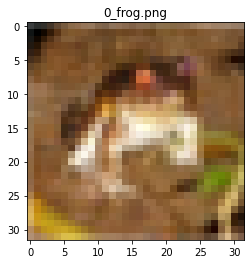

In [31]:
plt.title(os.path.basename(path))
plt.imshow(image) # RGB라서 따로 차원축소 안해줘도 돼
plt.show()

# tf.data

In [32]:
data_paths[:10]

['dataset/cifar/train\\0_frog.png',
 'dataset/cifar/train\\10000_automobile.png',
 'dataset/cifar/train\\10001_frog.png',
 'dataset/cifar/train\\10002_frog.png',
 'dataset/cifar/train\\10003_ship.png',
 'dataset/cifar/train\\10004_ship.png',
 'dataset/cifar/train\\10005_cat.png',
 'dataset/cifar/train\\10006_deer.png',
 'dataset/cifar/train\\10007_frog.png',
 'dataset/cifar/train\\10008_airplane.png']

In [33]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

In [34]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset # string으로 하나하나

<TensorSliceDataset shapes: (), types: tf.string>

In [35]:
dataset = dataset.map(read_image)

In [36]:
tf_images = next(iter(dataset)) # for문으로 돌릴 때 첫번째것만 가져와
tf_images.shape

TensorShape([32, 32, 3])

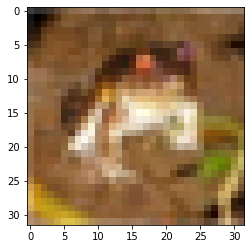

In [37]:
plt.imshow(tf_images)
plt.show()

## Batch로 묶기

In [41]:
# 우리가 하고 싶은건 하나씩이 아니라 batch로 묶어서 여러개 나오게

batch_size = 8

dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)

In [42]:
tf_image = next(iter(dataset))

In [43]:
tf_image.shape # batch_size만큼 묵였음

TensorShape([8, 32, 32, 3])

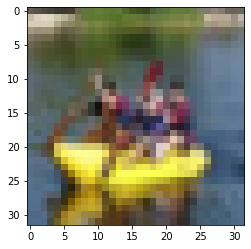

In [44]:
plt.imshow(tf_image[4])
plt.show()

## Shuffle 하기

In [45]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths) # 데이터 경로
dataset = dataset.map(read_image) # 함수로 이미지 읽음, map을 여러개 적용해도됨
dataset = dataset.batch(batch_size) # batch_size 적용
dataset = dataset.shuffle(buffer_size=len(data_paths)) # shuffle 
# buffer_size를 낮추면 shuffle하는게 느려져, 높이면 빨라짐

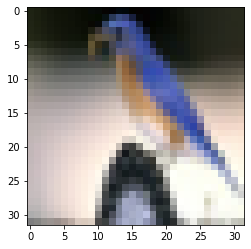

In [47]:
tf_images = next(iter(dataset))

plt.imshow(tf_images[0])
plt.show() # 개구리가 안나오니 shuffle이 됐다는 뜻

## Label하고 같이 넣기 

In [49]:
# 데이터 경로만 넣어줘서 이미지 읽어오는 것만 했는데
# 사실 나중엔 image와 label을 같이 뽑는 게 필요! 

path

'dataset/cifar/train\\0_frog.png'

In [53]:
class_name = path.split('_')[-1].replace('.png', '')

In [56]:
def get_label(path):
    return path.split('_')[-1].replace('.png', '')

In [57]:
path, get_label(path)

('dataset/cifar/train\\0_frog.png', 'frog')

In [58]:
label_names = [get_label(path) for path in data_paths]
label_names[:10]

['frog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship',
 'cat',
 'deer',
 'frog',
 'airplane']

In [59]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [60]:
# one-hot encoding
class_names == 'frog' # frog 부분만 True가 떠

array([False, False, False, False, False, False,  True, False, False,
       False])

In [62]:
onehot_encoding = np.array(class_names == 'frog', np.uint8) # frog 부분만 1이 됨
onehot_encoding

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [72]:
def onehot_encoding(label):
    return np.array(class_names == label, np.uint8)

In [73]:
def get_label(path):
    return path.split('_')[-1].replace('.png', '')

In [63]:
data_paths[:10]

['dataset/cifar/train\\0_frog.png',
 'dataset/cifar/train\\10000_automobile.png',
 'dataset/cifar/train\\10001_frog.png',
 'dataset/cifar/train\\10002_frog.png',
 'dataset/cifar/train\\10003_ship.png',
 'dataset/cifar/train\\10004_ship.png',
 'dataset/cifar/train\\10005_cat.png',
 'dataset/cifar/train\\10006_deer.png',
 'dataset/cifar/train\\10007_frog.png',
 'dataset/cifar/train\\10008_airplane.png']

In [64]:
label_names[:10]

['frog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship',
 'cat',
 'deer',
 'frog',
 'airplane']

In [66]:
def read_image_label(path, label):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image, label

In [67]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
dataset = dataset.map(read_image_label) # dataset 경로에 2개가 들어갔으니 map할 인자도 2개
dataset = dataset.batch(batch_size)
dataset = dataset.repeat() # 이걸 안해주면 데이터 쭉 훑고나서 epoch 1개 끝나고나면 그냥 끝나버려 꼭 넣어줘해

In [68]:
image, label = next(iter(dataset))

In [69]:
image.shape, label.shape

(TensorShape([8, 32, 32, 3]), TensorShape([8]))

In [70]:
label[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

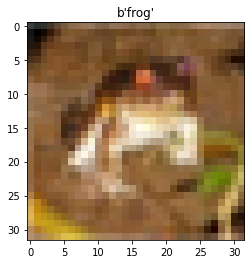

In [71]:
plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()

## tensorflow 함수로 label 얻기

In [75]:
path

'dataset/cifar/train\\0_frog.png'

In [76]:
def onehot_encoding(label):
    return np.array(class_names == label, np.uint8)

In [77]:
onehot_encoding('frog')

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [79]:
fname = tf.strings.split(path, '_')[-1]
fname

<tf.Tensor: shape=(), dtype=string, numpy=b'frog.png'>

In [83]:
cls_name = tf.strings.regex_replace(fname, '.png', '')
cls_name

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

In [87]:
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [90]:
onehot_encoding = tf.cast(class_names == cls_name, tf.uint8) # boolean을 interger로
onehot_encoding

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

In [91]:
# path만으로 label 얻기

def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    cls_name = tf.strings.regex_replace(fname, '.png', '')
    onehot_encoding = tf.cast(class_names == cls_name, tf.uint8)
    return onehot_encoding

In [92]:
def read_image_label(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    # get label
    label = get_label(path)
    
    return image, label

In [93]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat() 

In [94]:
image, label = next(iter(dataset))

In [95]:
image.shape

TensorShape([8, 32, 32, 3])

In [96]:
label.shape # 뒤에 10이 붙었다는 건 onehot encoding이 됐다는 뜻

TensorShape([8, 10])

In [98]:
label[0]

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

C:\Users\hyun\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


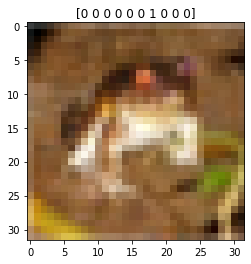

In [99]:
plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()

In [ ]:
# tf.data로 load image할 때 필요한 것들

In [ ]:
data_paths = glob('dataset/cifar/train/*.png')

In [ ]:
def get_label(path):
    return path.split('_')[-1].replace('.png', '')

label_names = [get_label(path) for path in data_paths]

class_names = np.unique(label_names)

In [ ]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    cls_name = tf.strings.regex_replace(fname, '.png', '')
    onehot_encoding = tf.cast(class_names == cls_name, tf.uint8)
    return onehot_encoding

In [ ]:
def read_image_label(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    # get label
    label = get_label(path)
    
    return image, label

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat() 